In [60]:
import json
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx

### Reading episode 1 interactions file 
#### interactions show the total characters in the episode as well as the number of times each of those characters interact in any scene mutually

In [55]:
with open('../star-wars-network-data-master/starwars-episode-1-interactions.json') as f:
    data = json.load(f)

pprint(data)

{'links': [{'source': 1, 'target': 0, 'value': 1},
           {'source': 2, 'target': 3, 'value': 1},
           {'source': 4, 'target': 3, 'value': 1},
           {'source': 0, 'target': 3, 'value': 1},
           {'source': 4, 'target': 0, 'value': 26},
           {'source': 1, 'target': 3, 'value': 1},
           {'source': 5, 'target': 1, 'value': 1},
           {'source': 5, 'target': 3, 'value': 1},
           {'source': 1, 'target': 6, 'value': 8},
           {'source': 6, 'target': 7, 'value': 2},
           {'source': 1, 'target': 7, 'value': 1},
           {'source': 9, 'target': 8, 'value': 3},
           {'source': 8, 'target': 10, 'value': 1},
           {'source': 9, 'target': 10, 'value': 3},
           {'source': 11, 'target': 0, 'value': 22},
           {'source': 11, 'target': 4, 'value': 12},
           {'source': 11, 'target': 12, 'value': 2},
           {'source': 13, 'target': 0, 'value': 2},
           {'source': 13, 'target': 4, 'value': 2},
           {'source'

In [52]:
df_links = pd.DataFrame(data['links'])
df_nodes = pd.DataFrame(data['nodes'])

In [53]:
df_links

,source,target,value
0,1,0,1
1,2,3,1
2,4,3,1
3,0,3,1
4,4,0,26
...,...,...,...
124,5,7,1
125,36,35,2
126,36,15,2
127,17,36,1


In [54]:
df_nodes

,name,value,colour
0,QUI-GON,60,#4f4fb1
1,NUTE GUNRAY,18,#808080
2,PK-4,2,#808080
3,TC-14,4,#808080
4,OBI-WAN,33,#48D1CC
5,DOFINE,3,#808080
6,RUNE,10,#808080
7,TEY HOW,4,#808080
8,EMPEROR,13,#191970
9,CAPTAIN PANAKA,19,#808080


In [56]:
df_links.to_csv('sw_episode1_links.csv')
df_links.to_csv('sw_episode1_nodes.csv')

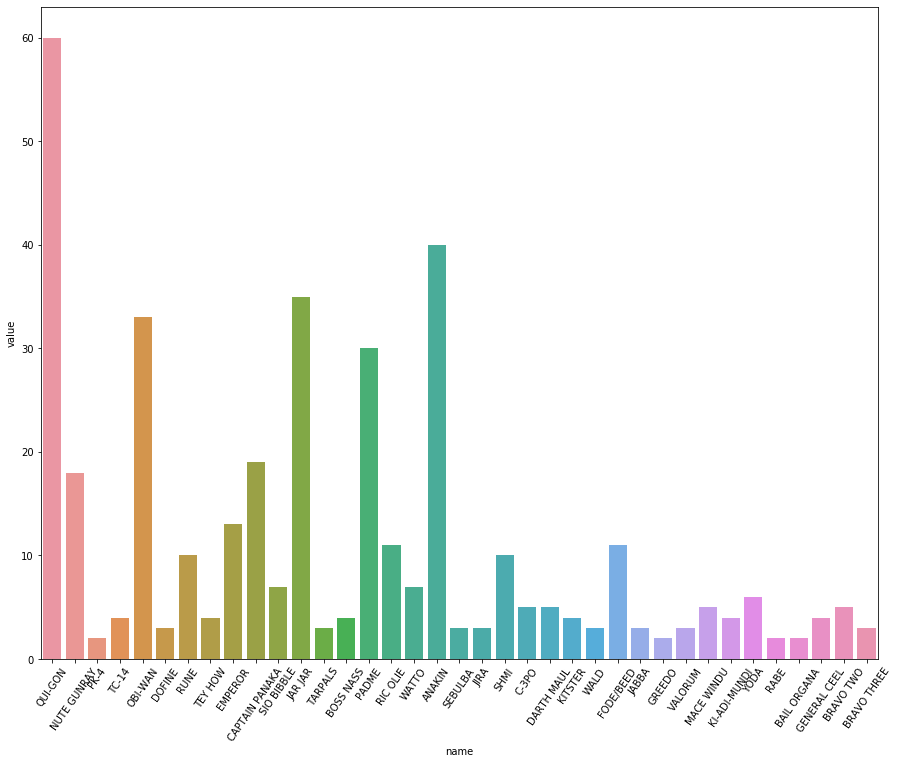

In [85]:
# sns.set_theme(style="whitegrid")
fig = plt.figure(figsize = (15, 12))
ax = sns.barplot(x='name', y='value', data=df_nodes)
ax.tick_params(axis='x', rotation=55)